In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPool2D, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
data_root = "../datasets/digit-recognizer/"
train = pd.read_csv(data_root+'train.csv')
test = pd.read_csv(data_root+'test.csv')

In [4]:
# works on tensors
# train, val = tf.split(tf.random.shuffle(train), [train_num, val_num], 0)

In [5]:
y_train = train['label']
x_train = train.drop(['label'], axis=1)
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
x_train.isnull().any(axis=1).describe()

count     42000
unique        1
top       False
freq      42000
dtype: object

In [7]:
test.isnull().any(axis=1).describe()

count     28000
unique        1
top       False
freq      28000
dtype: object

In [8]:
x_train = x_train/255.0
test = test/255.0

In [9]:
x_train['pixel345']

0        0.000000
1        0.094118
2        0.000000
3        0.082353
4        0.764706
           ...   
41995    0.537255
41996    0.000000
41997    0.000000
41998    0.858824
41999    0.850980
Name: pixel345, Length: 42000, dtype: float64

In [10]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [11]:
y_train = to_categorical(y_train, num_classes=10)

In [12]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [45]:
# data augmentation
data_aug = 1
if data_aug:
    gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
    gen.fit(x_train)

In [40]:
print(x_val.shape)
print(y_val.shape)
print(x_train.shape)
print(y_train.shape)

(4200, 28, 28, 1)
(4200, 10)
(37800, 28, 28, 1)
(37800, 10)


In [17]:
y_val[2]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

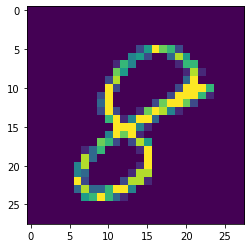

In [18]:
g = plt.imshow(x_train[0][:,:,0])

In [19]:
y_val_class = pd.Series(np.argmax(y_val, axis=1))
y_val_class.value_counts()

1    485
4    461
7    446
3    418
6    413
0    411
9    409
2    403
8    382
5    372
dtype: int64

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [49]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
epochs = 30
batch_size = 128

In [52]:
if data_aug:
    history = model.fit_generator(gen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/30
296/295 [==============================] - 30s 101ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0148 - val_accuracy: 0.9952
Epoch 2/30
296/295 [==============================] - 28s 95ms/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 0.0123 - val_accuracy: 0.9955
Epoch 3/30
296/295 [==============================] - 29s 100ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.0141 - val_accuracy: 0.9952
Epoch 4/30
296/295 [==============================] - 29s 99ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0142 - val_accuracy: 0.9955
Epoch 5/30
296/295 [==============================] - 29s 99ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0139 - val_accuracy: 0.9952
Epoch 6/30
296/295 [==============================] - 30s 101ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0133 - val_accuracy: 0.9952
Epoch 7/30
296/295 [==============================] - 30s 101ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0124 - val_accur

In [50]:
history = model.fit(x=x_train, y=y_train, batch_size=batch_size,
            epochs=epochs, validation_data=(x_val, y_val), 
                    steps_per_epoch=x_train.shape[0]//batch_size, verbose=1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 8576/37800 [=====>........................] - ETA: 14s - loss: 0.0159 - accuracy: 0.9948

KeyboardInterrupt: 

In [53]:
model.evaluate(x=x_val, y=y_val, verbose=2)

4200/1 - 1s - loss: 0.0243 - accuracy: 0.9955


[0.013832712266359327, 0.9954762]

In [51]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.089115,0.972831,0.026727,0.991905
1,0.079183,0.976825,0.018629,0.994286
2,0.072466,0.978042,0.024497,0.992381
3,0.070941,0.978783,0.020406,0.992143
4,0.067485,0.979603,0.017225,0.994524
5,0.065885,0.980714,0.023547,0.993095
6,0.063907,0.980952,0.022075,0.993333
7,0.059827,0.982593,0.019703,0.994286
8,0.059043,0.983148,0.018932,0.994048
9,0.056056,0.982725,0.025129,0.992143


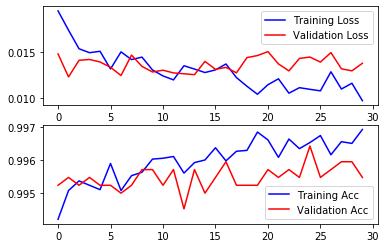

In [54]:
# loss and accuracy plots
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend = ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'], color='b', label='Training Acc')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation Acc', axes=ax[1])
legend = ax[1].legend(loc='best')

In [55]:
# confusion matrix
y_pred = model.predict(x_val)
y_pred_class = np.argmax(y_pred, axis=1)
y_true_class = np.argmax(y_val, axis=1)

# use tf.math.confusion_matrix later

c_matrix = confusion_matrix(y_true_class, y_pred_class)
# print(c_matrix)
c_matrix = pd.DataFrame(c_matrix)
c_matrix

[[410   0   0   0   0   0   1   0   0   0]
 [  0 484   0   0   0   0   0   0   1   0]
 [  0   0 403   0   0   0   0   0   0   0]
 [  0   0   0 416   0   0   0   0   2   0]
 [  0   0   0   0 457   0   1   0   0   3]
 [  0   0   0   1   0 368   1   0   2   0]
 [  0   0   0   0   0   1 411   0   1   0]
 [  0   0   0   1   0   0   0 445   0   0]
 [  0   0   0   0   0   0   0   0 381   1]
 [  0   0   0   0   1   0   0   1   1 406]]


,0,1,2,3,4,5,6,7,8,9
0,410,0,0,0,0,0,1,0,0,0
1,0,484,0,0,0,0,0,0,1,0
2,0,0,403,0,0,0,0,0,0,0
3,0,0,0,416,0,0,0,0,2,0
4,0,0,0,0,457,0,1,0,0,3
5,0,0,0,1,0,368,1,0,2,0
6,0,0,0,0,0,1,411,0,1,0
7,0,0,0,1,0,0,0,445,0,0
8,0,0,0,0,0,0,0,0,381,1
9,0,0,0,0,1,0,0,1,1,406


In [56]:
# analyse model errors
errors = (y_pred_class != y_true_class)


In [57]:
y_pred_class_e = y_pred_class[errors]
y_pred_e = y_pred[errors]
y_true_class_e = y_true_class[errors]
x_val_e = x_val[errors]


IndexError: index 19 is out of bounds for axis 0 with size 19

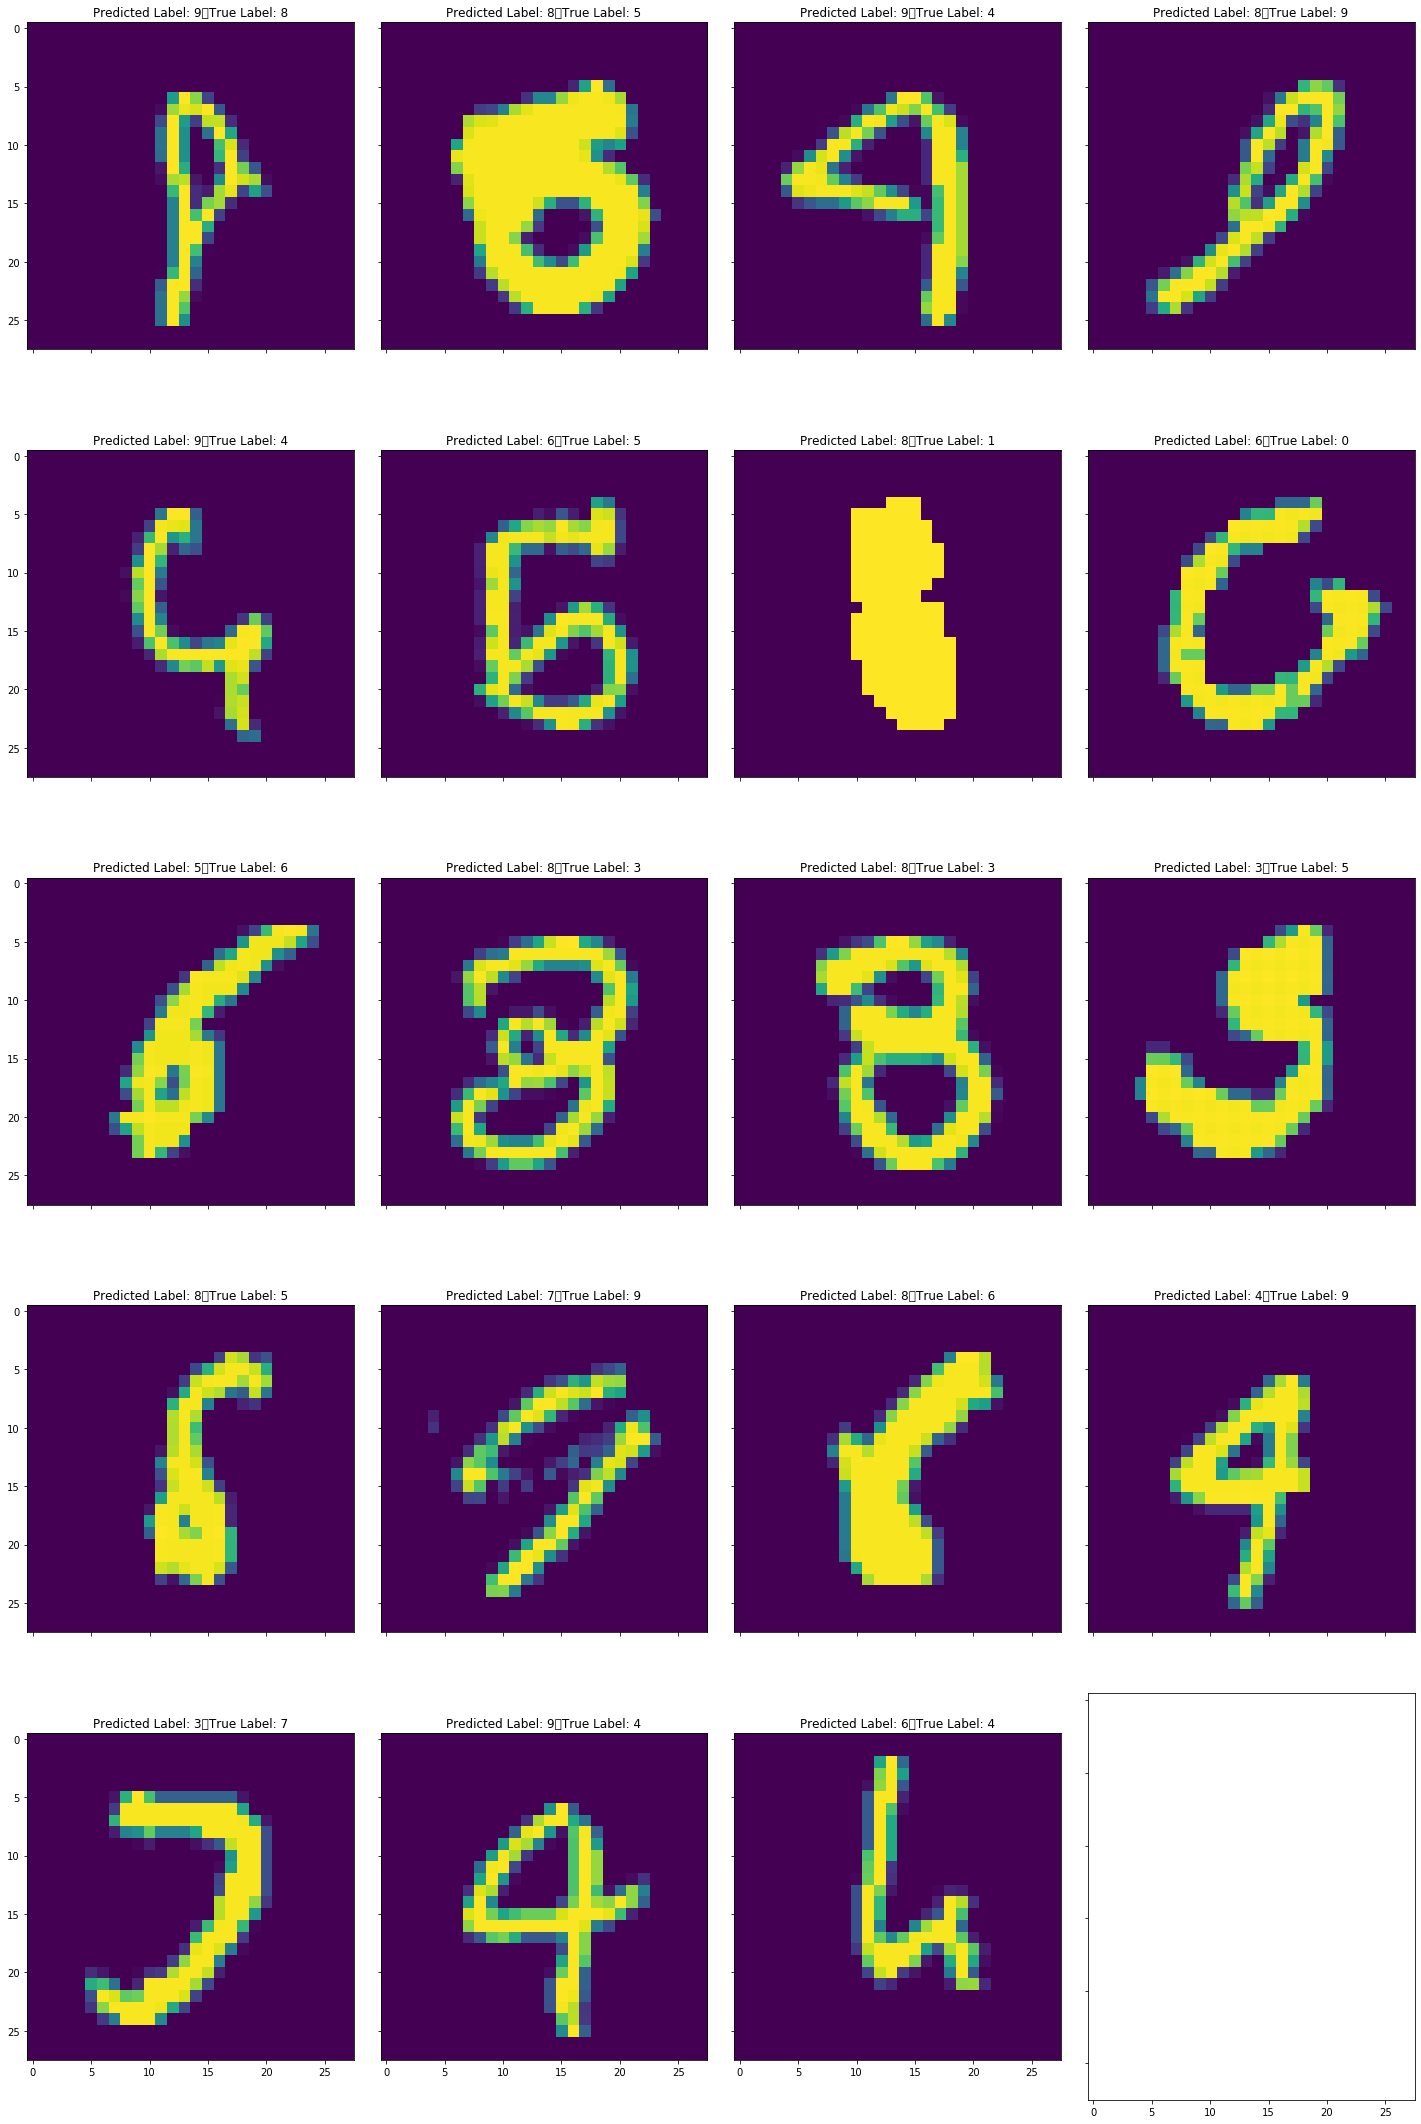

In [59]:
num_e = x_val_e.shape[0]
e = 0

# plt.rcParams.update({'font.size': 12})

# plot with 4 columns and #errors / 4 + 1 rows
if num_e%4 == 0: nrows=num_e/4 
else: nrows=num_e//4+1
fig, ax = plt.subplots(nrows=nrows, ncols=4, 
                      sharex=True, sharey=True, figsize=(20, 30))
fig.tight_layout()
# you could also use subplots_adjust function with adjustment button

for r in range(nrows):
    for c in range(4):
        ax[r, c].imshow(x_val_e[e].reshape((28, 28)))
        ax[r,c].set_title(f'Predicted Label: {y_pred_class_e[e]}\tTrue Label: {y_true_class_e[e]}')
        e += 1

In [60]:
# make submission
res = np.argmax(model.predict(test), axis=1)

In [61]:
submission = pd.DataFrame({'ImageId':range(1, res.shape[0]+1), 'Label': res})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [62]:
submission.to_csv('../datasets/digit-recognizer/digitRecognizer.csv', index=False)